# 2-3. 하스스톤 직업별 점유율 데이터 시각화 [모든 등급]

## 라이브러리

In [3]:
import pandas as pd # 구조화된 데이터나 표 형식의 데이터 분석 및 조작을 위한 라이브러리
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import seaborn as sns # Matplotlib을 기반으로 고급화된 시각화 기능을 제공하는 라이브러리
from matplotlib import font_manager, rc # Matplotlib에서 폰트를 설정하기 위한 라이브러리
import numpy as np # 다차원 배열을 처리하고 수치 해석을 위한 라이브러리
from matplotlib.ticker import FuncFormatter # 범례 텍스트 수정을 위한 라이브러리
import os # 현재 작업 디렉토리 확인을 위한 라이브러리

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 설정을 완료했다는 출력
print("Setup Complete")

Setup Complete


## 직업별 점유율 데이터 가져오기

In [4]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
meta_filepath = os.path.join(current_directory, 'all', './hs_meta.csv')

# 데이터 불러오기
meta_data = pd.read_csv(meta_filepath)

# 'Winrate' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Winrate'] = meta_data['Winrate'].str.rstrip('%').astype('float')

# 'Popular' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Popular'] = meta_data['Popular'].str.rstrip('%').astype('float')

# 'Games' 열에서 쉼표 제거하고 숫자로 변환
meta_data['Games'] = meta_data['Games'].str.replace(',', '').astype('int')

# 데이터 헤드와 행,열 개수 확인
print(meta_data.shape)
meta_data.head()

(66, 5)


,Hero,Deck,Winrate,Popular,Games
0,죽음의 기사,Plague Death Knight,55.9,6.8,120000
1,죽음의 기사,부정 죽음의 기사,39.6,3.8,68000
2,죽음의 기사,혈기 죽음의 기사,40.9,2.2,40000
3,죽음의 기사,냉기 죽음의 기사,48.1,1.0,18000
4,죽음의 기사,Rainbow Death Knight,48.3,0.6,11000


## 직업 및 덱별 색상 지정

In [5]:
# 직업별 색깔 지정
hero_colors = {
    '죽음의 기사': 'cyan',
    '성기사': 'yellow',
    '드루이드': 'brown',
    '마법사': 'skyblue',
    '전사': 'red',
    '흑마법사': 'purple',
    '사냥꾼': 'green',
    '사제': 'gray',
    '도적': 'black', 
    '주술사': 'blue',   
    '악마사냥꾼' : 'lightseagreen'
}

In [6]:
# 각 덱에 대한 유사한 색깔 지정
deck_colors = {
    'Plague Death Knight': 'darkslategray',
    '부정 죽음의 기사': 'teal',
    '혈기 죽음의 기사': 'darkcyan',
    '냉기 죽음의 기사': 'cadetblue',
    'Rainbow Death Knight': 'cyan',
    'Highlander Blood Death Knight': 'lightcyan',
    '기타 죽음의 기사': 'crimson',
    '어그로 악마사냥꾼': 'lightseagreen',
    '빅 악마사냥꾼': 'turquoise',
    '하이랜더 악마사냥꾼': 'aquamarine',
    '유물 악마사냥꾼': 'lime',
    '기타 악마사냥꾼': 'crimson',
    '용 드루이드': 'saddlebrown',
    '하이랜더 드루이드': 'brown',
    '나무정령 드루이드': 'chocolate',
    '기타 드루이드': 'crimson',
    '사냥개 사냥꾼': 'olive',
    '비전 사냥꾼': 'yellowgreen',
    '하이랜더 사냥꾼': 'green',
    '기타 사냥꾼': 'crimson',
    'Rainbow Mage': 'steelblue',
    'Mining Mage': 'dodgerblue',
    '비밀 마법사': 'deepskyblue',
    'Spooky Mage': 'skyblue',
    '정령 마법사': 'lightskyblue',
    '하이랜더 마법사': 'lightblue',
    'Lightshow Mage': 'cadetblue',
    '기계 마법사': 'aqua',
    '기타 마법사': 'crimson',
    '어그로 성기사': 'darkgoldenrod',
    'Showdown Paladin': 'goldenrod',
    '하이랜더 성기사': 'yellow',
    '신병 성기사': 'orange',
    'Earthen Paladin': 'khaki',
    '기타 성기사': 'crimson',
    '컨트롤 사제': 'dimgray',
    '언데드 사제': 'gray',
    '하이랜더 사제': 'darkgray',
    'Automaton Priest': 'slategray',
    'Ogre Priest': 'lightcyan',
    '기타 사제': 'crimson',
    'Mining Rogue': 'black',
    'Wishing Rogue': 'dimgray',
    'Ogre Rogue': 'gray',
    'Mech Rogue': 'darkgray',
    'Big Rogue': 'silver',
    '미라클 도적': 'lightgray',
    '비밀 도적': 'thistle',
    '기타 도적': 'crimson',
    '하이랜더 주술사': 'blue',
    '토템 주술사': 'blue',
    '정령 주술사': 'skyblue',
    '자연 주술사': 'darkblue',
    '기타 주술사': 'crimson',
    'Mining Warlock': 'indigo',
    '타디우스 흑마법사': 'darkviolet',
    '저주 흑마법사': 'purple',
    'Sludge Warlock': 'violet',
    '하이랜더 흑마법사': 'plum',
    '기타 흑마법사': 'crimson',
    '컨트롤 전사': 'coral',
    '격노 전사': 'red',
    '도발 전사': 'darkred',
    '하이랜더 전사': 'brown',
    "Rock 'n' Roll Warrior": 'salmon',
    '기타 전사': 'crimson',
}

## 1) 하스스톤 직업별 플레이 빈도
<pre>
▶ 기간 : 2023년 11월 15일 [최신 확장팩 "황야의 땅 결투" 출시일] ~ 11월 28일자
▶ 대상 : 전 서버에 존재하는 모든 등급 유저
</pre>

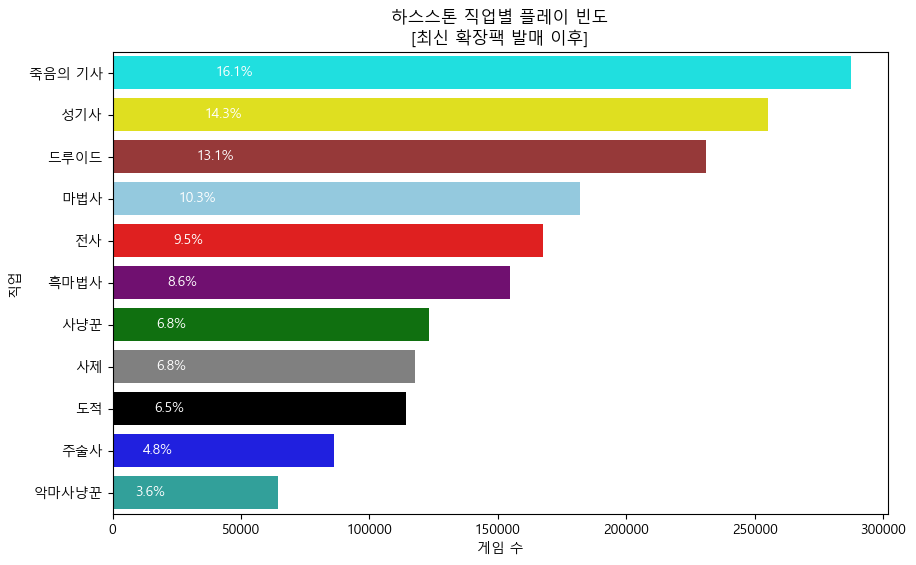

In [7]:
# 직업을 기준으로 그룹화 하여 직업별 게임 플레이 빈도를 계산한 데이터프레임 생성
hero_total = meta_data.groupby(['Hero'])[['Popular','Games']].sum().reset_index()

# 게임 수가 많은 순으로 정렬
hero_total = hero_total.sort_values(by='Games', ascending=False)

# 정렬된 순서대로 색상 리스트 생성
sorted_colors = [hero_colors[hero] for hero in hero_total['Hero']]

# 그래프 사이즈
plt.figure(figsize=(10, 6))

# Games를 x축, Hero를 y축으로 한 막대 그래프
hero_graph = sns.barplot(x='Games', y='Hero', data=hero_total, palette=sorted_colors)

# 타이틀 및 레이블 설정
plt.title("하스스톤 직업별 플레이 빈도\n[최신 확장팩 발매 이후]")
plt.xlabel("게임 수")
plt.ylabel("직업")

# 각 막대 안에 점유율을 표시
for index, value in enumerate(hero_total['Popular']):
    hero_graph.text(value * 2500, index, f'{value:.1f}%', va='center', fontsize=10, color='white')

# 그래프 출력
plt.show()

## 1) 분석
- 죽음의기사, 성기사, 드루이드 3직업의 점유율 합이 전체 점유율의 1/3 이상을 차지한다.
- 마법사, 흑마법사, 전사 3직업이 각 10% 내외의 점유율을 차지한다.
- 주술사, 악마사냥꾼은 각 5% 미만의 점유율 차지한다.

## 함수
<pre>
load_and_process_data(file_path) : 데이터를 불러와서 정제하는 함수
draw_pie_chart(ax, server_total, title, colors, wedgeprops, explode) : 파이차트 그리는 함수
</pre>

In [8]:
# 데이터 불러오기 및 처리하는 함수
def load_and_process_data(file_path):
    # 메타 데이터 불러오기 : usecols - 해당 열을 선택
    data = pd.read_csv(file_path, usecols=['Hero', 'Winrate', 'Popular', 'Games'])

    # 열의 데이터들을 숫자로 변환
    data['Winrate'] = pd.to_numeric(data['Winrate'].str.rstrip('%'), errors='coerce')
    data['Popular'] = pd.to_numeric(data['Popular'].str.rstrip('%'), errors='coerce')
    data['Games'] = pd.to_numeric(data['Games'].str.replace(',', ''), errors='coerce')
    
    # 직업을 기준으로 그룹화하고 각 그룹의 열들의 값을 합산
    grouped_data = data.groupby('Hero').sum().reset_index()
    
    # Popular 열을 기준으로 내림차순으로 정렬
    sorted_data = grouped_data.sort_values(by='Popular', ascending=False)
    
    # 직업별 점유율 값 순으로 정렬된 데이터프레임 반환
    return sorted_data

# 파이 차트를 그리는 함수
def draw_pie_chart(ax, server_total, title, colors, wedgeprops, explode):
    # ax : 서브플롯(axex) 객체로, 그래프가 그려질 위치를 나타냄
    ax.pie(
        server_total['Games'],
        labels=server_total['Hero'],
        autopct=lambda p: f'{p:.2f}%' if p > 0 else '',
        explode=explode,
        colors=colors,
        wedgeprops=wedgeprops,
        startangle=0,
        shadow=True,
        textprops={'color': 'black'}
    )
    ax.set_title(title)
    
# 설정을 완료했다는 출력
print("Setup Complete")

Setup Complete


## 2) 하스스톤 직업별 플레이 빈도
<pre>
▶ 기간 : 2023년 11월 15일 [최신 확장팩 "황야의 땅 결투" 출시일] ~ 11월 28일자
▶ 대상 : 각 서버에 존재하는 모든 등급 유저
</pre>

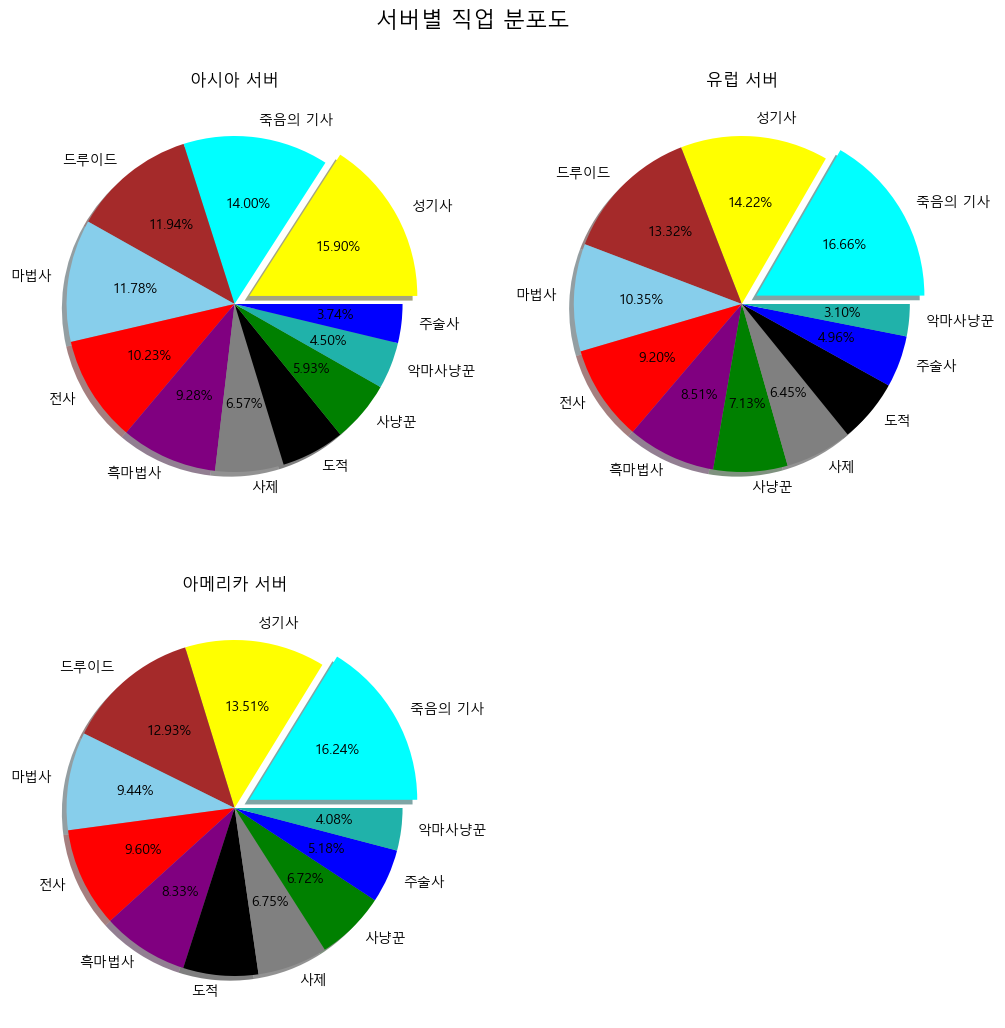

In [9]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
filepaths = {
    'ap': os.path.join(current_directory, 'all', './hs_meta-AP.csv'),
    'eu': os.path.join(current_directory, 'all', './hs_meta-EU.csv'),
    'us': os.path.join(current_directory, 'all', './hs_meta-US.csv'),
}

# 서버별 데이터 합치기
ap_total = load_and_process_data(filepaths['ap'])
eu_total = load_and_process_data(filepaths['eu'])
us_total = load_and_process_data(filepaths['us'])

# 파이 차트 설정
wedgeprops = {'width': 1, 'edgecolor': 'k', 'linewidth': 0}  # 부채꼴 스타일
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # 중심 벗어나는 정도

# 서버별 데이터 합치기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))  # 2행 2열로 배열

# 서버 정보 설정
servers = [('아시아', ap_total, '아시아'), ('유럽', eu_total, '유럽'), ('아메리카', us_total, '아메리카')]

# 파이 차트 그리기
for i, (server, server_total, title) in enumerate(servers):
    colors = server_total['Hero'].map(hero_colors)
    draw_pie_chart(axes[i // 2, i % 2], server_total, f'{server} 서버', colors, wedgeprops, explode)

# 빈 서브플롯 설정
axes[1, 1].axis('off')

# 전체 타이틀 설정
fig.suptitle("서버별 직업 분포도", y=0.95, fontsize=16)

# 그래프 출력
plt.show()

## 2) 분석
- 유럽, 아메리카 서버의 직업 점유율은 죽음의기사>성기사>드루이드 순을 보인다.
- 아시아 서버의 직업 점유율은 타 서버와 상이하게 성기사>죽음의기사>드루이드 순을 보인다.

## 일별 데이터 가져오기

In [10]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일명과 날짜 매핑
file_date_mapping = {
    'day24': '24',
    'day25': '25',
    'day26': '26',
    'day27': '27',
    'day28': '28',
}

# 데이터프레임을 저장할 리스트
data_frames = []

# 파일 불러오기 및 데이터 가공
for file_name, date in file_date_mapping.items():
    file_path = os.path.join(current_directory, 'day', f'./hs_meta_{date}.csv')
    data = pd.read_csv(file_path)

    # 열의 데이터들을 숫자로 변환
    data['Winrate'] = data['Winrate'].str.rstrip('%').astype('float')
    data['Popular'] = data['Popular'].str.rstrip('%').astype('float')
    data['Games'] = data['Games'].str.replace(',', '').astype('int')

    # 'Day' 열 추가
    data['Day'] = date

    # 리스트에 데이터프레임 추가
    data_frames.append(data)

# 데이터 헤드와 행,열 개수 확인
print(data.shape)
data.head()


(66, 6)


,Hero,Deck,Winrate,Popular,Games,Day
0,죽음의 기사,Plague Death Knight,56.0,6.8,20000,28
1,죽음의 기사,부정 죽음의 기사,40.4,4.5,13000,28
2,죽음의 기사,혈기 죽음의 기사,44.3,2.9,8800,28
3,죽음의 기사,냉기 죽음의 기사,49.5,1.1,3400,28
4,죽음의 기사,Rainbow Death Knight,49.9,0.7,2000,28


## 3) 일별 직업 점유율 추이
<pre>
▶ 기간 : 2023년 11월 24일 [데이터 수집 시작일] ~ 11월 28일자
▶ 대상 : 전 서버에 존재하는 모든 등급 유저
</pre>

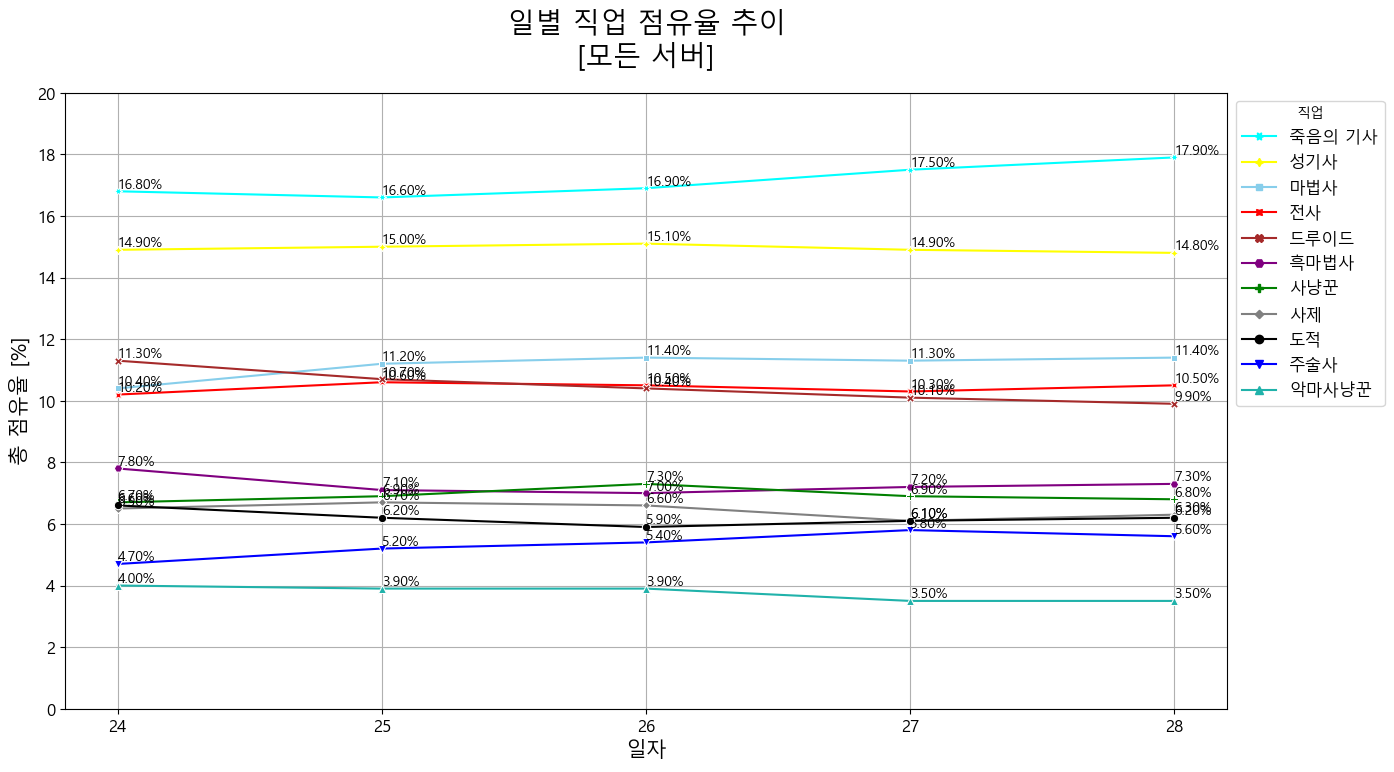

In [11]:
# 모든 데이터프레임을 하나로 합치기
all_days_data = pd.concat(data_frames, ignore_index=True)

# 각 날짜의 직업별 점유율 합 구하기
daily_popular_by_hero = all_days_data.groupby(['Day', 'Hero'])[['Popular']].sum().reset_index()

# 직업별 마지막 날짜 (28일)의 Popular 값에 따라 정렬
sorted_heroes = daily_popular_by_hero[daily_popular_by_hero['Day'] == '28'].sort_values(by='Popular', ascending=False)['Hero'].tolist()

# 그래프 사이즈
plt.figure(figsize=(15, 8))

# 선 그래프
sns.lineplot(
    data=daily_popular_by_hero, 
    x='Day', 
    y='Popular', 
    hue='Hero',
    style='Hero', # 직업별로 다른 마크 설정
    markers=True, # 마크 표시 여부
    dashes=False, # 대시 여부
    palette=hero_colors, 
    hue_order=sorted_heroes
    )

# 각 직업별 총 점유율 값을 선에 표시
for index, row in daily_popular_by_hero.iterrows():
    plt.text(row['Day'], row['Popular'], f"{row['Popular']:.2f}%", color='black', fontsize=10, ha='left', va='bottom')

# 타이틀 및 레이블 설정
plt.title('일별 직업 점유율 추이\n[모든 서버]', pad=20, fontsize=20)
plt.xlabel('일자', fontsize=15)
plt.ylabel('총 점유율 [%]', fontsize=15)

# 축 설정
plt.xticks(fontsize=12)
plt.yticks(np.arange(0, 21, 2), fontsize=12)
plt.grid(True)

# 범례 설정
plt.legend(title='직업', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# 그래프 출력
plt.show()

## 3) 분석
- 마법사는 데이터 수집을 시작한 24일에 비해 마지막 수집일인 28일에 점유율이 상승하는 추세를 보인다. [10.4% > 11.4%]
- 드루이드는 24일에 비해 28일에 점유율이 하락하는 추세를 보인다. [11.3% > 9.9%]

## 4) 등급별 직업 점유율 추이
<pre>
▶ 기간 : 2023년 11월 15일 [최신 확장팩 "황야의 땅 결투" 출시일] ~ 11월 28일자
▶ 대상 : 전 서버에 존재하는 해당 등급 유저
</pre>

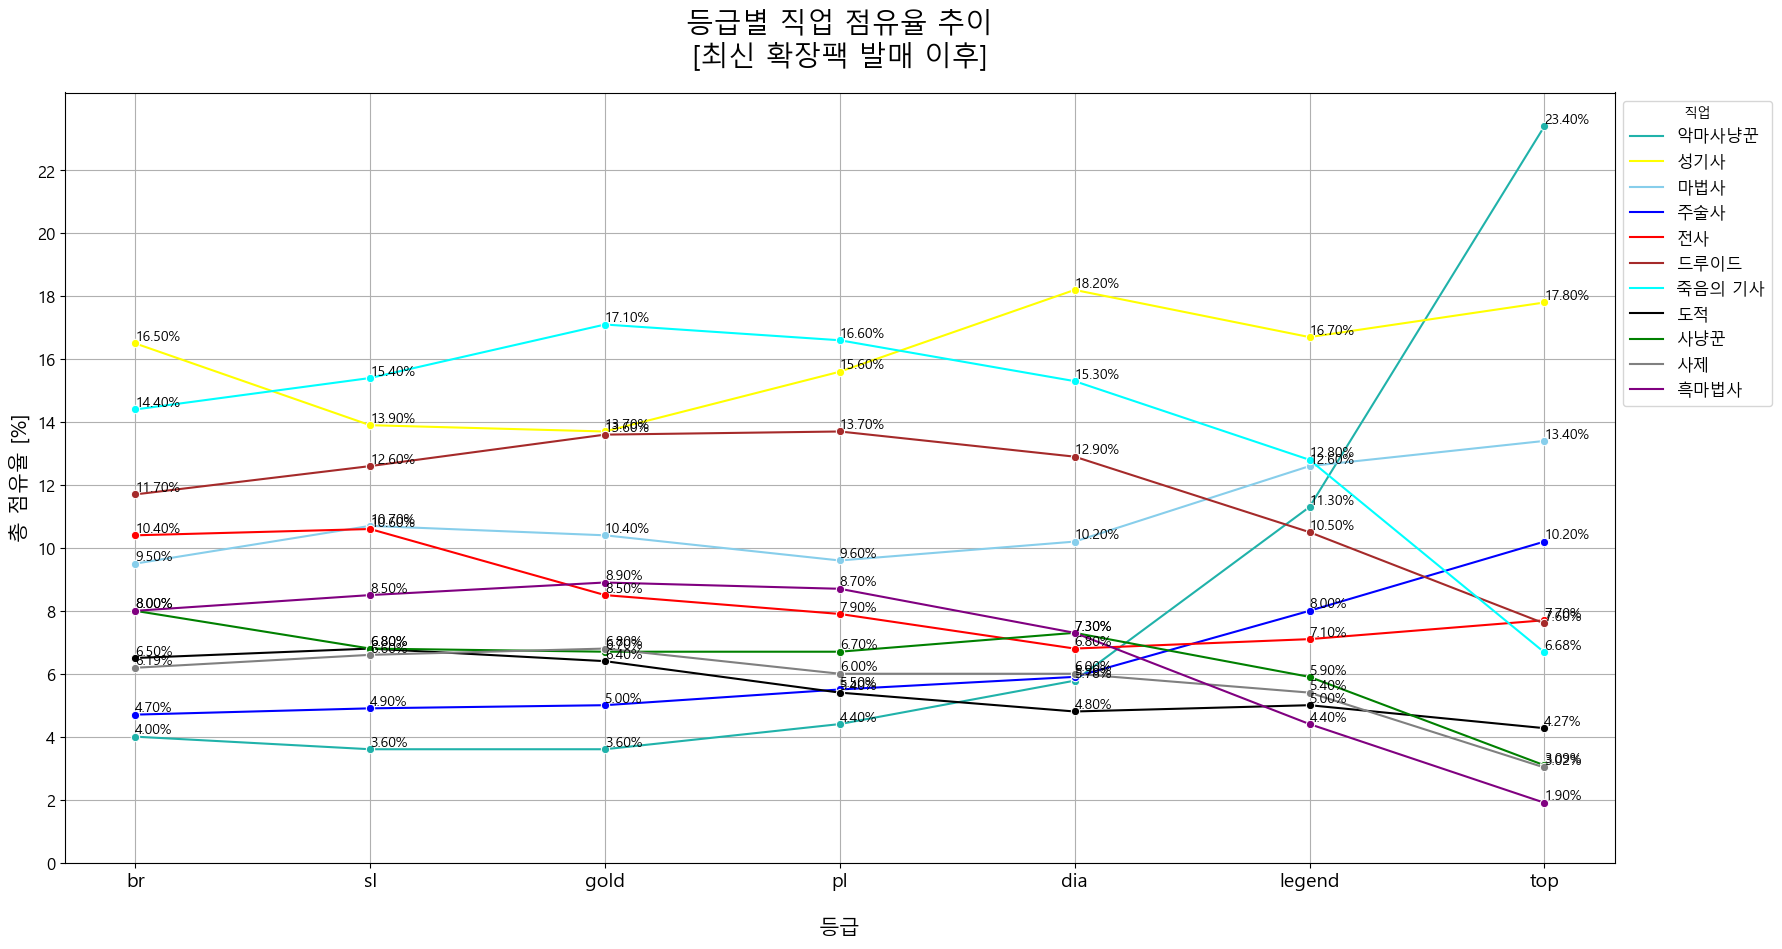

In [12]:
# 각 열들의 데이터를 숫자로 변환하는 함수
def preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data['Winrate'] = data['Winrate'].str.rstrip('%').astype('float')
    data['Popular'] = data['Popular'].str.rstrip('%').astype('float')
    data['Games'] = data['Games'].str.replace(',', '').astype('int')
    return data

# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
filepaths = {
    'br': os.path.join(current_directory, 'br', './hs_meta.csv'),
    'sl': os.path.join(current_directory, 'sl', './hs_meta.csv'),
    'gold': os.path.join(current_directory, 'gold', './hs_meta.csv'),
    'pl': os.path.join(current_directory, 'pl', './hs_meta.csv'),
    'dia': os.path.join(current_directory, 'dia', './hs_meta.csv'),
    'legend': os.path.join(current_directory, 'legend', './hs_meta.csv'),
    'top': os.path.join(current_directory, '1000', './hs_meta.csv'),
}

# 데이터 불러오기 및 전처리
rank_data = {key: preprocess_data(value) for key, value in filepaths.items()}

# 파일명을 기반으로 Rank 열 추가
for rank, data in rank_data.items():
    data['Rank'] = rank

# 랭크별 데이터 합치기
all_rank_data = pd.concat(list(rank_data.values()))

# 랭크 및 직업별 Popular 합 구하기
rank_popular_by_hero = all_rank_data.groupby(['Rank', 'Hero'])[['Popular']].sum().reset_index()

# 직업별 상위 1000의 Popular 값에 따라 정렬
sorted_heroes = rank_popular_by_hero[rank_popular_by_hero['Rank'] == 'top'].sort_values(by='Popular', ascending=False)['Hero'].tolist()

# 랭크 순서 정의
rank_order = ['br', 'sl', 'gold', 'pl', 'dia', 'legend', 'top']

# 랭크를 범주형 데이터로 변환하여 순서를 지정
rank_popular_by_hero['Rank'] = pd.Categorical(rank_popular_by_hero['Rank'], categories=rank_order, ordered=True)

# 직업별 상위 1000의 Popular 값에 따라 정렬
sorted_heroes = rank_popular_by_hero[rank_popular_by_hero['Rank'] == 'top'].sort_values(by='Popular', ascending=False)['Hero'].tolist()

# 시각화
plt.figure(figsize=(20, 10))
sns.lineplot(data=rank_popular_by_hero, x='Rank', y='Popular', hue='Hero', marker='o', palette=hero_colors, hue_order=sorted_heroes)

# 각 직업별 총 점유율 값을 선에 표시
for index, row in rank_popular_by_hero.iterrows():
    plt.text(row['Rank'], row['Popular'], f"{row['Popular']:.2f}%", color='black', fontsize=10, ha='left', va='bottom')

plt.title('등급별 직업 점유율 추이\n[최신 확장팩 발매 이후]', pad=20, fontsize=20)
plt.xlabel('등급', labelpad=20, fontsize=15)
plt.ylabel('총 점유율 [%]', fontsize=15)
plt.legend(title='직업', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# 축 설정
plt.xticks(fontsize=14)
plt.yticks(np.arange(0, 24, 2), fontsize=12)
plt.grid(True)

plt.show()


## 4) 분석
- 악마사냥꾼은 하위 랭크에서는 낮은 점유율을 보이나, 다이아 이상의 상위 랭크로 갈수록 점유율이 급격하게 증가하여 상위 1000등권에서는 직업 점유율 1위를 차지한다.
- 죽음의 기사는 하위 랭크에서는 높은 점유율을 보이나, 전설 이상의 상위 랭크로 갈수록 점유율이 급격하게 감소하여 상위 1000등권에서는 직업 점유율 하위권에 위치한다.

# 2-4. 등급에 따른 메타 분석 [모든 등급]

## 직업별 덱 유형별 총 점유율 데이터 시각화를 위한 데이터 정제

In [13]:
# 직업별 총 점유율을 계산한 데이터프레임 생성
# 직업을 기준으로 그룹화하고 점유율의 값을 합하여 각 직업별 총 점유율을 계산
# reset_index() : 결과를 새로운 데이터프레임으로 변환하고, 총 점유율 순으로 정렬
hero_popular_total = meta_data.groupby('Hero')['Popular'].sum().reset_index().sort_values(by='Popular', ascending=True)

# 직업 순서를 기준으로 Hero 열을 Categorical 변수로 변환
# tolist() : 위 데이터프레임에서 총 점유율 순으로 정렬한 Hero 열을 추출하고 리스트로 변환
# Categorical : 위 hero_order 리스트를 통해 시각화 시 정렬 순서를 지정
hero_order = hero_popular_total['Hero'].tolist()
meta_data['Hero'] = pd.Categorical(meta_data['Hero'], categories=hero_order, ordered=True)

# 정렬된 직업 순서를 기준으로 원본 데이터프레임 정렬
deck_total = meta_data.sort_values(by=['Hero', 'Popular'], ascending=[True, False])

# '기타'가 포함된 경우 뒤에 직업 이름 추가하여 '덱'열을 수정
# lambda : 각 행에 적용되는 익명 함수, apply 함수를 데이터프레임의 각 행에 적용
# 조건문을 사용하여 '기타'가 포함되어 있는지 확인하고, 있다면 덱 열 뒤에 직업을 추가
deck_total['Deck'] = deck_total.apply(lambda row: f"{row['Deck']} {row['Hero']}" if '기타' in row['Deck'] else row['Deck'], axis=1)

# 데이터 헤드와 행,열 개수 확인
print(deck_total.shape)
deck_total.head()

(66, 5)


,Hero,Deck,Winrate,Popular,Games
7,악마사냥꾼,어그로 악마사냥꾼,56.0,2.5,45000
11,악마사냥꾼,기타 악마사냥꾼,24.3,0.4,7100
8,악마사냥꾼,빅 악마사냥꾼,36.5,0.3,5100
9,악마사냥꾼,하이랜더 악마사냥꾼,43.0,0.2,4000
10,악마사냥꾼,유물 악마사냥꾼,38.8,0.2,3400


## 1) 직업별 덱 유형별 점유율
<pre>
▶ 기간 : 2023년 11월 15일 [최신 확장팩 "황야의 땅 결투" 출시일] ~ 11월 28일자
▶ 대상 : 전 서버에 존재하는 모든 등급 유저
</pre>

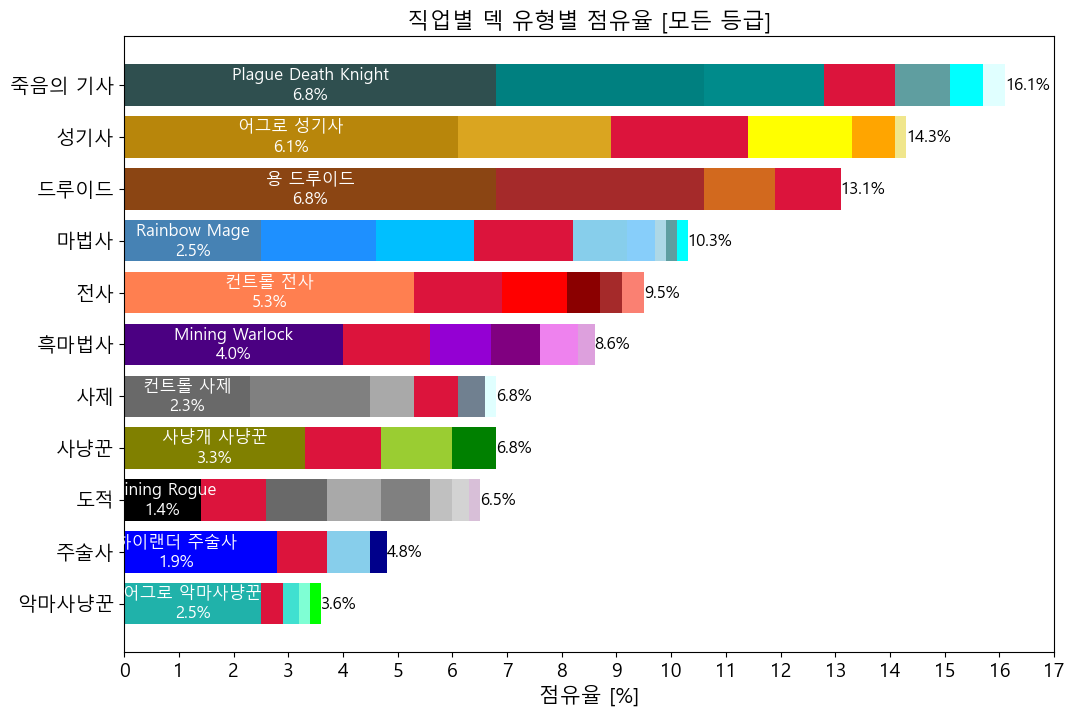

In [14]:
# 직업별로 덱 유형별 점유율을 누적으로 변환
deck_total['Cumulative_Popular'] = deck_total.groupby(['Hero'])['Popular'].cumsum()

# 그래프 사이즈
plt.figure(figsize=(12, 8))

# 각 덱에 대해 누적 막대 그래프 그리기
# unique : 각 덱의 이름을 가져오기
# enumerate : 인덱스 i와 덱의 이름 deck 가져오기
for i, deck in enumerate(deck_total['Deck'].unique()):
    # 현재 덱에 대한 데이터 추출
    current_deck_data = deck_total[deck_total['Deck'] == deck]

    # 막대 그래프 그리기
    plt.barh(
        current_deck_data['Hero'],
        current_deck_data['Popular'],
        label=deck,
        color=deck_colors[deck],
        left=current_deck_data['Cumulative_Popular'] - current_deck_data['Popular']
    )

# 직업별 가장 높은 점유율을 가진 덱 정보 가져오기
# lambda : 각 직업별로 가장 높은 점유율을 가진 덱에 대한 정보를 선택
max_popular_row = deck_total.groupby('Hero').apply(lambda x: x.loc[x['Popular'].idxmax()])

# 직업별 총 점유율 정보 가져오기
total_popular_row = deck_total.groupby('Hero').apply(lambda x: x.loc[x['Cumulative_Popular'].idxmax()])

# 직업별로 가장 높은 점유율을 가진 덱 정보에 대한 범례 추가
# iterrows : 각 행의 인덱스와 해당하는 데이터를 반복적으로 반환
for index, row in max_popular_row.iterrows():
    plt.text(row['Cumulative_Popular']/2, row['Hero'],
             f"{row['Deck']}\n{row['Popular']:.1f}%",
             color='white', ha='center', va='center', fontsize=12)

# 직업별로 총 점유율 정보에 대한 범례 추가
for index, row in total_popular_row.iterrows():
    plt.text(row['Cumulative_Popular'], row['Hero'],
             f"{row['Cumulative_Popular']:.1f}%",
             color='black', ha='left', va='center', fontsize=12)

# 타이틀 및 레이블 설정
plt.title("직업별 덱 유형별 점유율 [모든 등급]", fontsize=16)
plt.xlabel("점유율 [%]", fontsize =15)

# 축 설정
plt.xticks(range(0, 18), fontsize=14)
plt.yticks(fontsize=14)

# 범례 설정
plt.legend().set_visible(False)

# 그래프 출력
plt.show()

## 승률 통계 데이터 가져오기

In [15]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
matchup_filepath = os.path.join(current_directory, 'all', './hs_matchups.csv')

# 데이터 불러오기 (.csv 파일 읽기)
# index_col=0 : 첫번째 열을 행 인덱스로 사용하도록 지정
matchup_data = pd.read_csv(matchup_filepath, index_col=0)

# 주어진 값에서 '%'를 제거하고 숫자로 변환하는 함수
def convert_to_numeric(value):
    # '%' 제거 후 숫자로 변환하고 반환
    try:
        return float(value.rstrip('%'))
    # 예외 처리 : NaN 반환
    except ValueError:
        return float('nan')

# '%'로 끝나는 열에 대해 함수 적용
matchup_data = matchup_data.applymap(convert_to_numeric)

# 데이터 헤드와 행,열 개수 확인
print(matchup_data.shape)
matchup_data.head()

(14, 14)


,Plague Death Knight,용 드루이드,어그로 성기사,컨트롤 전사,Mining Warlock,하이랜더 드루이드,부정 죽음의 기사,사냥개 사냥꾼,Showdown Paladin,Rainbow Mage,어그로 악마사냥꾼,Unnamed: 12,컨트롤 사제,혈기 죽음의 기사
Plague Death Knight,NaN,40.65,37.11,56.93,46.41,60.74,63.51,39.98,39.25,48.14,50.34,61.51,65.69,64.65
용 드루이드,59.34,NaN,30.89,58.24,56.85,49.89,76.40,51.31,30.45,60.21,61.13,63.49,54.78,72.01
어그로 성기사,62.88,69.10,NaN,68.44,62.75,73.90,65.12,63.59,44.39,56.19,49.54,73.12,72.27,74.70
컨트롤 전사,43.06,41.75,31.55,NaN,35.88,35.59,64.31,44.06,42.62,51.73,48.79,59.66,60.37,69.63
Mining Warlock,53.58,43.14,37.24,64.11,NaN,43.73,65.35,45.22,44.73,51.66,43.65,66.15,62.51,70.01


## 2) 덱별 대전 통계
<pre>
▶ 기간 : 2023년 11월 15일 [최신 확장팩 "황야의 땅 결투" 출시일] ~ 11월 28일자
▶ 대상 : 전 서버에 존재하는 모든 등급 유저
</pre>

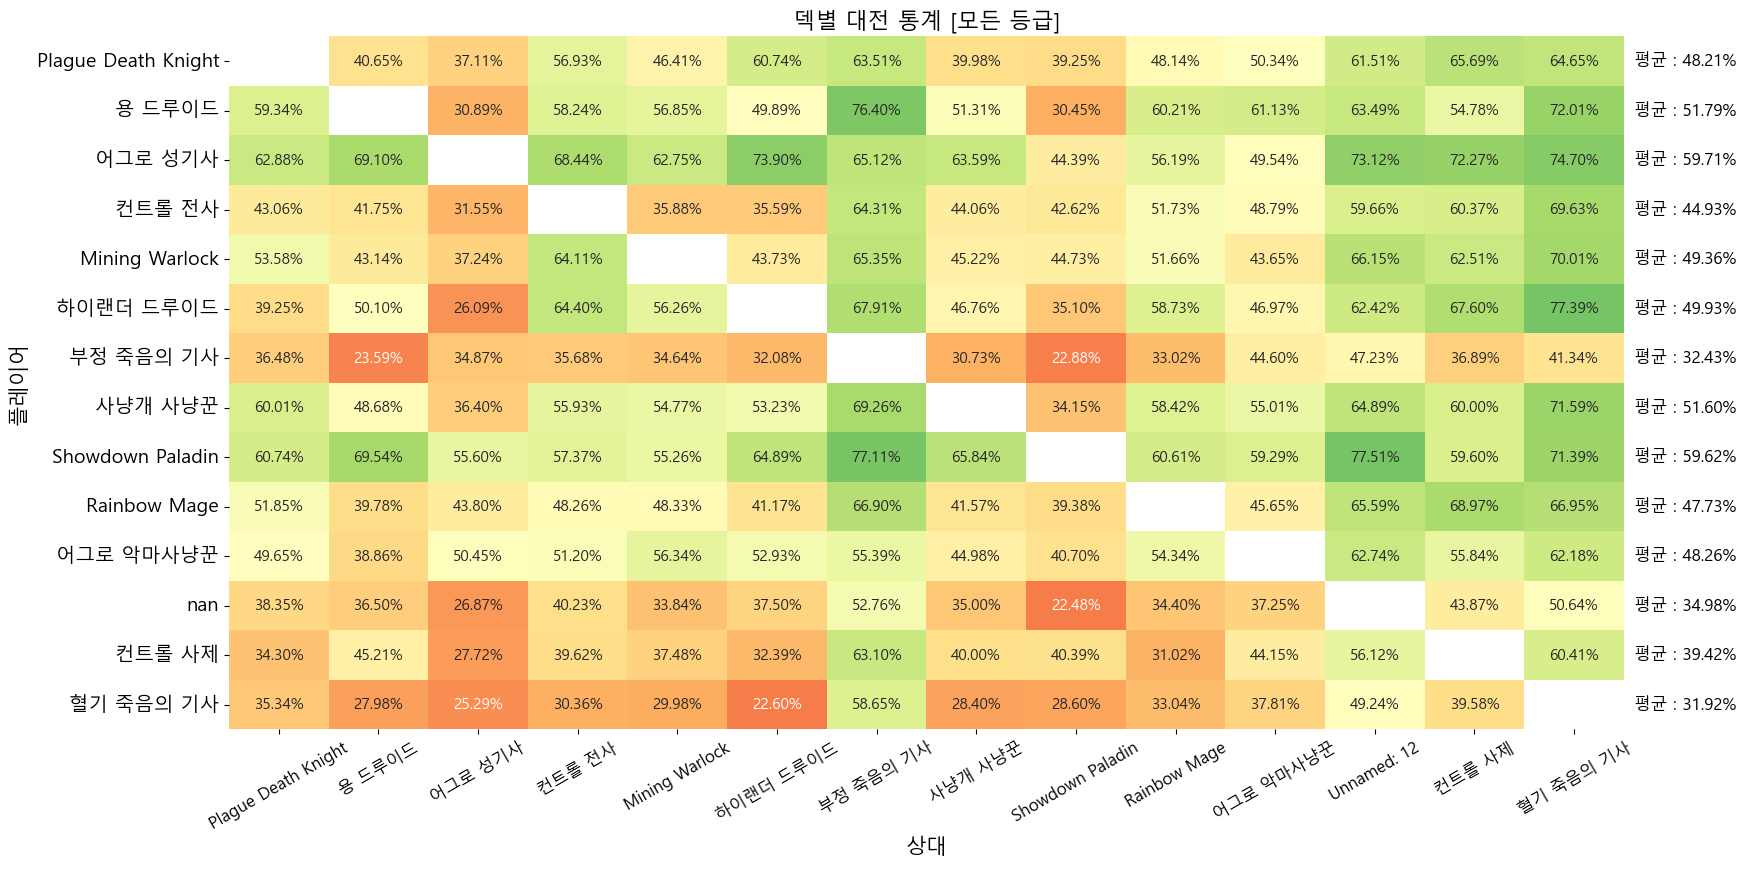

In [23]:
# 그래프 사이즈
plt.figure(figsize=(18, 9)) 

# 히트맵 그리기
heatmap = sns.heatmap(data=matchup_data, annot=True, fmt='.2f', cmap='RdYlGn', vmin=0, vmax=100, annot_kws={"size": 11}, cbar=False)

# 행별 열의 합의 평균값을 우측에 표시
# enumerate : 인덱스 i와 행의 이름 row_name 가져오기
for i, row_name in enumerate(matchup_data.index):
    # 각 행의 총합을 계산
    row_sum = matchup_data.loc[row_name].sum()
    # 각 행의 열의 합의 평균을 계산
    avg_value = row_sum / len(matchup_data.columns)
    # 평균값 표시
    heatmap.text(len(matchup_data.columns)+0.1, i + 0.5, f'평균 : {avg_value:.2f}', ha='left', va='center', fontsize=12, color='black')

# 각 텍스트 레이블에 퍼센트 추가
for text in heatmap.texts:
    text.set_text(f"{text.get_text()}%")

# 타이틀 및 레이블 설정
plt.title("덱별 대전 통계 [모든 등급]", fontsize=16)
plt.xlabel("상대", fontsize=15)
plt.ylabel("플레이어", fontsize=15)

# 축 설정
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=14)

# 그래프 설정
plt.show()